# Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
%matplotlib inline

# Load Data

In [3]:
def load_data(file_path):
    """
    xyz
    """
    df = pd.read_csv(file_path)
    
    sex_mapping = {"male": 0, "female": 1}
    df['Sex'] = df['Sex'].map(sex_mapping)
    
    return df
    
    

In [4]:
df_train = load_data('train.csv')

In [5]:
df_test = load_data('test.csv')

# Data Exploration

In [6]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
30,31,0,1,"Uruchurtu, Don. Manuel E",0,40.0,0,0,PC 17601,27.7208,NaN,C
409,410,0,3,"Lefebre, Miss. Ida",1,NaN,3,1,4133,25.4667,NaN,S
758,759,0,3,"Theobald, Mr. Thomas Leonard",0,34.0,0,0,363294,8.0500,NaN,S
47,48,1,3,"O'Driscoll, Miss. Bridget",1,NaN,0,0,14311,7.7500,NaN,Q
387,388,1,2,"Buss, Miss. Kate",1,36.0,0,0,27849,13.0000,NaN,S


In [7]:
df_train.shape

(891, 12)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [9]:
df_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,909,3,"Assaf, Mr. Gerios",0,21.0,0,0,2692,7.2250,NaN,C
285,1177,3,"Dennis, Mr. William",0,36.0,0,0,A/5 21175,7.2500,NaN,S
371,1263,1,"Wilson, Miss. Helen Alice",1,31.0,0,0,16966,134.5000,E39 E41,C
45,937,3,"Peltomaki, Mr. Nikolai Johannes",0,25.0,0,0,STON/O 2. 3101291,7.9250,NaN,S
404,1296,1,"Frauenthal, Mr. Isaac Gerald",0,43.0,1,0,17765,27.7208,D40,C


In [10]:
df_test.shape

(418, 11)

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


### Target

In [45]:
df_train['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

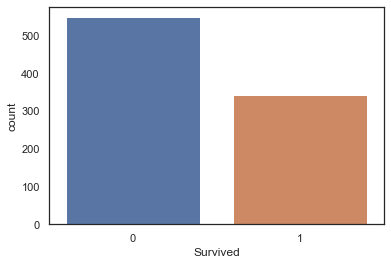

In [52]:
sns.countplot(x='Survived', data=df_train)

### Age

In [12]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

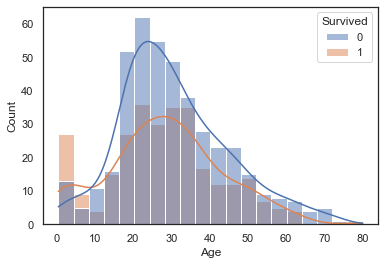

In [13]:
sns.histplot(x='Age',hue ='Survived', kde=True, data=df_train)

In [14]:
df_train_corr = df_train.corr().abs().unstack().sort_values(ascending=False).reset_index()
df_train_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)

In [15]:
df_train_corr[df_train_corr['Feature 1'] == 'Age']


,Feature 1,Feature 2,Correlation Coefficient
4,Age,Age,1.000000
14,Age,Pclass,0.369226
18,Age,SibSp,0.308247
26,Age,Parch,0.189119
36,Age,Fare,0.096067
38,Age,Sex,0.093254
44,Age,Survived,0.077221
51,Age,PassengerId,0.036847


## Fare

In [16]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

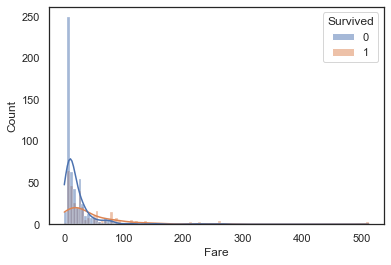

In [17]:
sns.histplot(x='Fare',hue ='Survived', kde=True, data=df_train)

## Cabin

In [18]:
df_train['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [19]:
df_train['Deck']=df_train['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else np.NaN)
df_test['Deck']=df_test['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else np.NaN)


In [20]:
df_train['Deck'].describe()

count     204
unique      8
top         C
freq       59
Name: Deck, dtype: object

In [21]:
df_train[df_train['Survived']==1].groupby('Deck')['Survived'].count().reset_index()

,Deck,Survived
0,A,7
1,B,35
2,C,35
3,D,25
4,E,24
5,F,8
6,G,2


In [22]:
total = df_train.groupby('Deck')['Survived'].count().reset_index()
survived = df_train[df_train['Survived']==1].groupby('Deck')['Survived'].count().reset_index()
survived['percent_survived'] = [i / j * 100 for i,j in zip(survived['Survived'], total['Survived'])]

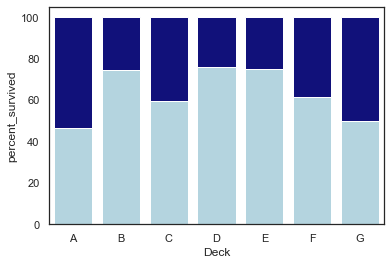

In [23]:
total = df_train.groupby('Deck')['Survived'].count().reset_index()
survived = df_train[df_train['Survived']==1].groupby('Deck')['Survived'].count().reset_index()
survived['percent_survived'] = [i / j * 100 for i,j in zip(survived['Survived'], total['Survived'])]
total['percent_survived'] = [i / j * 100 for i,j in zip(total['Survived'], total['Survived'])]

bar1 = sns.barplot(x="Deck",  y="percent_survived", data=total, color='darkblue')
bar2 = sns.barplot(x="Deck", y="percent_survived", data=survived, color='lightblue')

### Make One Dataframe

In [24]:
Y_train, X_train = (df_train['Survived'], df_train.drop(['Survived'], axis=1))

In [25]:
df_all = pd.concat([X_train, df_test], sort=True).reset_index(drop=True)

In [26]:
def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

### Handle Missing Data

#### Fill Numerical

In [27]:
numeric_columns = df_all.select_dtypes(include=['number']).columns

In [28]:
df_all[numeric_columns] = df_all[numeric_columns].fillna(-1)


#### Drop Categorical

In [29]:
df_all.drop(['Name','Ticket', 'Cabin', 'PassengerId'], axis=1, inplace = True)

#### Fill Categorical

In [30]:
categorical_columns = df_all.select_dtypes(exclude=['number']).columns

In [31]:
categorical_columns

Index(['Deck', 'Embarked'], dtype='object')

In [32]:
df_all[categorical_columns] = df_all[categorical_columns].fillna('missing')


In [33]:
df_all.head()

,Age,Deck,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.0,missing,S,7.2500,0,3,0,1
1,38.0,C,C,71.2833,0,1,1,1
2,26.0,missing,S,7.9250,0,3,1,0
3,35.0,C,S,53.1000,0,1,1,1
4,35.0,missing,S,8.0500,0,3,0,0


#### Encode Categorical

In [34]:
encode_columns = ['Deck','Embarked','Pclass','SibSp','Parch']

In [35]:
df_all = pd.get_dummies(data=df_all, columns=encode_columns)

In [36]:
df_all.sample(5)

,Age,Fare,Sex,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,...,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9
400,39.0,7.9250,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1098,24.0,10.5000,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
902,46.0,26.0000,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
231,29.0,7.7750,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
584,-1.0,8.7125,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Model

In [37]:
from sklearn.model_selection import train_test_split


In [38]:
def divide_df(all_data):
    # Returns divided dfs of training and test set
    return all_data.loc[:890], all_data.loc[891:]

In [39]:
train, test = divide_df(df_all)

In [40]:
x_train, x_val, y_train, y_val = train_test_split(train, Y_train, test_size = .2, random_state = 0)

### Gaussian Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [42]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

43.02


### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

82.68


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier


In [61]:
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

82.12


In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [63]:
confusion_matrix(y_pred, y_val)


array([[97, 19],
       [13, 50]])

In [64]:
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [67]:
randomforest_feature= randomforest.feature_importances_


In [71]:
x_train.columns

Index(['Age', 'Fare', 'Sex', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_T', 'Deck_missing', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Embarked_missing', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Parch_9'],
      dtype='object')

In [74]:
feat_importances = pd.Series(randomforest.feature_importances_, index=x_train.columns)


<AxesSubplot:>

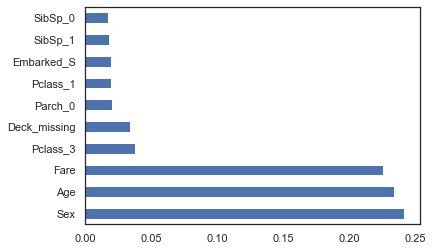

In [75]:
feat_importances.nlargest(10).plot(kind='barh')

### Gradient Boosting

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

83.8


#### XGBoost

In [81]:
import xgboost as xgb


In [82]:
gbm = xgb.XGBClassifier(
    objective= 'binary:logistic',
    eval_metric='auc'
    ).fit(x_train, y_train)
y_pred = gbm.predict(x_val)

/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [83]:
acc_xgb = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_xgb)

82.68


In [84]:
feat_importances = pd.Series(gbm.feature_importances_, index=x_train.columns)


<AxesSubplot:>

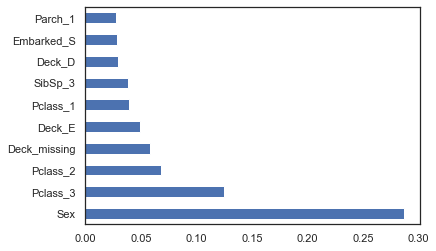

In [85]:
feat_importances.nlargest(10).plot(kind='barh')

In [86]:
confusion_matrix(y_pred, y_val)


array([[96, 17],
       [14, 52]])

In [87]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       110
           1       0.79      0.75      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

